# Homework

The following defines a directed cycle with ten nodes:

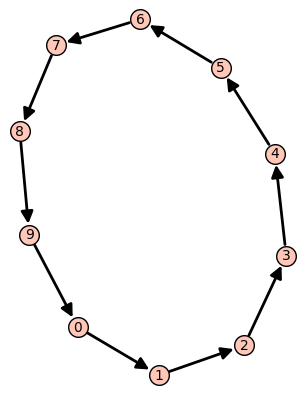

In [2]:
D1 = DiGraph([(i, (i+1)%10) for i in range(10)]); D1.show()

Define the same **directed graph** using:

1. an adjacency matrix
2. an incidence matrix
3. a boolean function

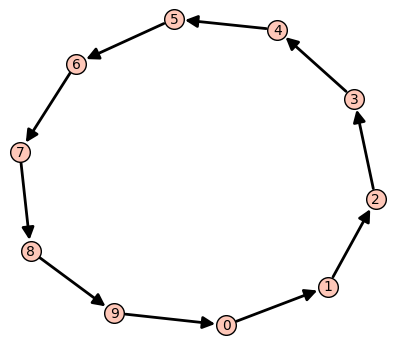

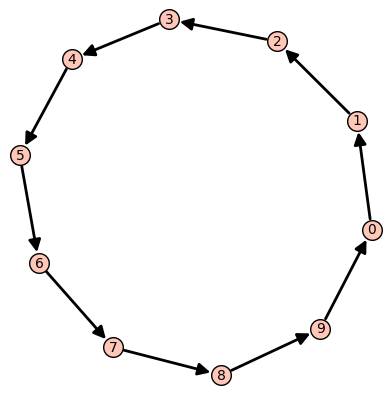

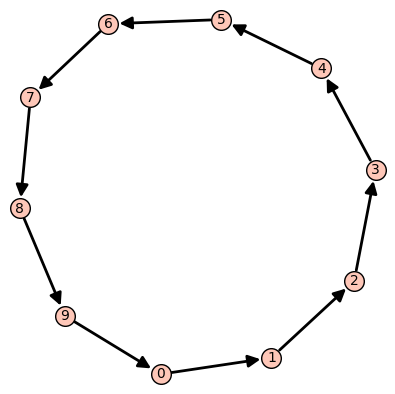

In [26]:
# Your code goes here:
A = Matrix(ZZ, 10, 10)
for i in range(9):
    A[i, i+1] = 1
A[9, 0] = 1
D2 = DiGraph(A, format='adjacency_matrix')

B=Matrix(ZZ,10,10)
for i in range(9):
    B[i,i]=1
    B[i,i+1]=-1
B[9,0]=-1
B[9,9]=1
D3 = DiGraph(B, format='incidence_matrix')

D4 = DiGraph([range(10), lambda i,j: j-i == 1 or (i==9 and j==0) ])

D2.show()
D3.show()
D4.show()


## Getting the spanning tree from a traversal

Modify the code for graph traversal below to return the resulting spanning tree, rather than just the traversal.

### Hint:
You need to maintain a pointer to where each node in ``can_visit`` "came from".

In [144]:
from collections import deque
def traversal(G, root, algorithm):
    r"""
    Return a traversal of ``G`` starting with root node ``r`` using DFS or BFS.
    
    INPUT:
    
    ``G`` - a graph or directed graph
    ``r`` - a node of ``G``
    ``algorithm`` - 'DFS' or 'BFS'
    """
    T = Graph()
    n = root
    traversal = [n]
    can_visit = deque(G.neighbors(n))
    while can_visit: # this runs so long as can_visit is non-empty
        if algorithm == 'DFS':
            m = can_visit.pop()
        elif algorithm == 'BFS':
            m = can_visit.popleft()
        else:
            raise ValueError('algorithm should be DFS or BFS')
        if m in traversal:
            pass
        else:
            T.add_edge([n,m])
            n = m
            traversal.append(n)
            can_visit.extend([v for v in G.neighbors(n) if not(v in traversal)])
    T.show()
    return traversal
    

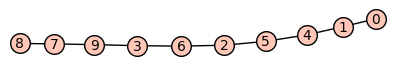

[0, 1, 4, 5, 2, 6, 3, 9, 7, 8]

In [145]:
G = graphs.PetersenGraph()
traversal(G, 0, algorithm='BFS')